# Модели стохастических объектов (методы анализа данных)
## Практическая работа №2
### КИ18-16 Прекель В.А.
### Вариант 14.
### Признаки `cat6_brandOfSoaps`, `cat2_hairColor`, `num1_15`, `num2_15`, `num3_15`.

In [296]:
from collections import Counter
from scipy.stats import sigmaclip
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [297]:
all_data = pd.read_excel('practice_dataframe.xlsx')

data = pd.DataFrame({
    'cat6_brandOfSoaps': all_data['cat6_brandOfSoaps'],
    'cat2_hairColor': all_data['cat2_hairColor'],
    'num1_15': all_data['num1_15'],
    'num2_15': all_data['num2_15'],
    'num3_15': all_data['num3_15']
})
data

,cat6_brandOfSoaps,cat2_hairColor,num1_15,num2_15,num3_15
0,lux,black,282.228024,NaN,807.976365
1,NaN,Red,1039.089956,268.388947,444.529442
2,Lux,black,500.696085,174.992127,428.723966
3,lux,Red,1346.429995,108.647900,520.238037
4,Dove,black,230.576445,150.113065,896.476167
...,...,...,...,...,...
995,Dove,Red,422.732662,170.810692,586.254084
996,lux,Brown,783.565442,237.086397,826.693312
997,Dove,Red,410.595523,196.686858,600.377791
998,Lux,black,-237.136035,179.262913,371.380055


In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat6_brandOfSoaps  980 non-null    object 
 1   cat2_hairColor     980 non-null    object 
 2   num1_15            1000 non-null   float64
 3   num2_15            950 non-null    float64
 4   num3_15            971 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


#### 1. Визуальный анализ данных

Столбчатые для категориальных до форматирования

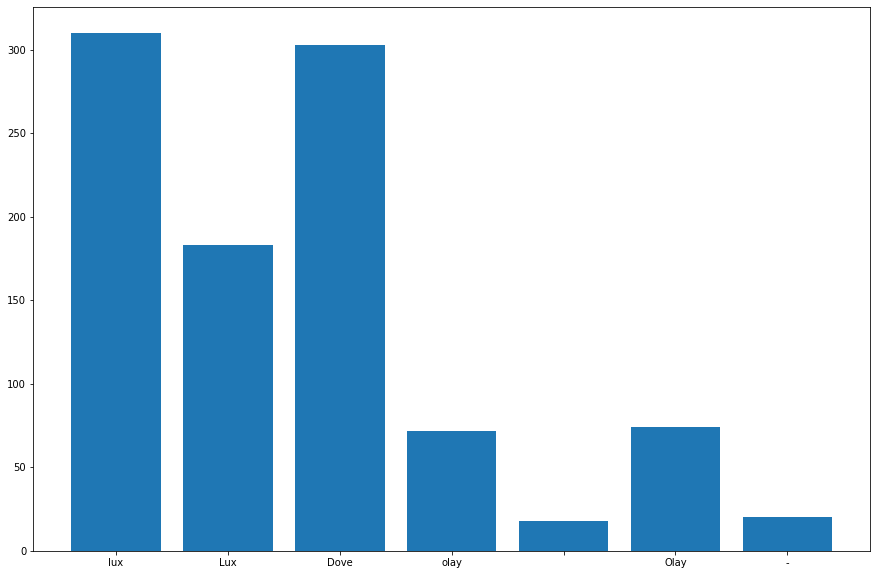

In [299]:
# cat6_brandOfSoaps
counts = Counter(data['cat6_brandOfSoaps'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

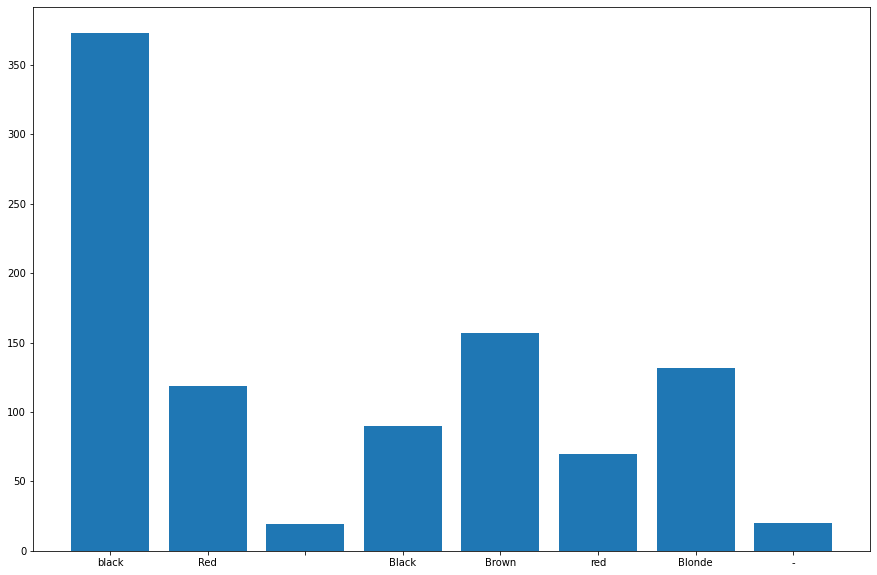

In [300]:
# cat2_hairColor
counts = Counter(data['cat2_hairColor'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

In [301]:
def base_format(data_frame: pd.DataFrame):
    return data_frame.replace({-9999: np.nan}).replace(r'^[\s-]*$', np.nan, regex=True)

def format_str(data_frame: pd.DataFrame):
    return base_format(data_frame).str.capitalize().str.rstrip()

data['cat6_brandOfSoaps'] = format_str(data['cat6_brandOfSoaps'])
data['cat2_hairColor'] = format_str(data['cat2_hairColor'])
data["num1_15"] = base_format(data['num1_15'])
data["num2_15"] = base_format(data['num2_15'])
data["num3_15"] = base_format(data['num3_15'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat6_brandOfSoaps  942 non-null    object 
 1   cat2_hairColor     941 non-null    object 
 2   num1_15            951 non-null    float64
 3   num2_15            950 non-null    float64
 4   num3_15            913 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [302]:
data.describe()

,num1_15,num2_15,num3_15
count,951.000000,950.000000,913.000000
mean,843.822989,148.963833,555.429557
std,716.182943,106.847552,221.358521
min,-1467.940219,-184.922189,-168.839273
25%,377.718319,82.347973,373.272578
50%,859.934249,145.220453,562.668399
75%,1301.342806,215.636532,731.795739
max,3201.191252,479.162302,1265.142875


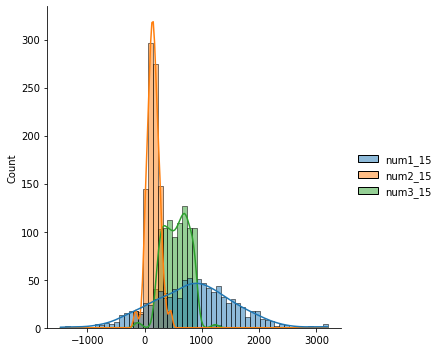

In [303]:
sns.displot(data=data, kde=True)

Ящик с усами для числовых

<AxesSubplot:ylabel='num1_15'>

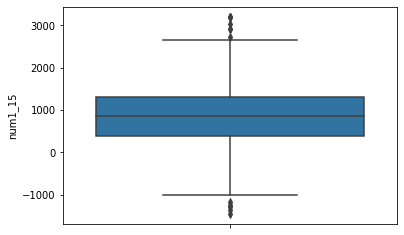

In [304]:
# num1_15
sns.boxplot(y=data['num1_15'])

<AxesSubplot:ylabel='num2_15'>

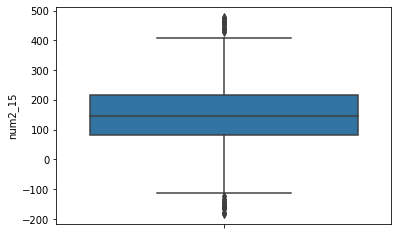

In [305]:
# num2_15
sns.boxplot(y=data['num2_15'])

<AxesSubplot:ylabel='num3_15'>

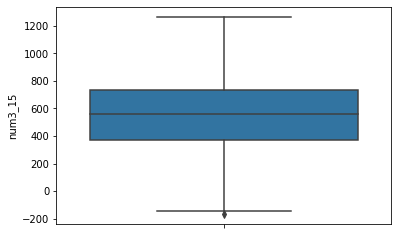

In [306]:
# num3_15
sns.boxplot(y=data['num3_15'])

Столбчатые для категориальных

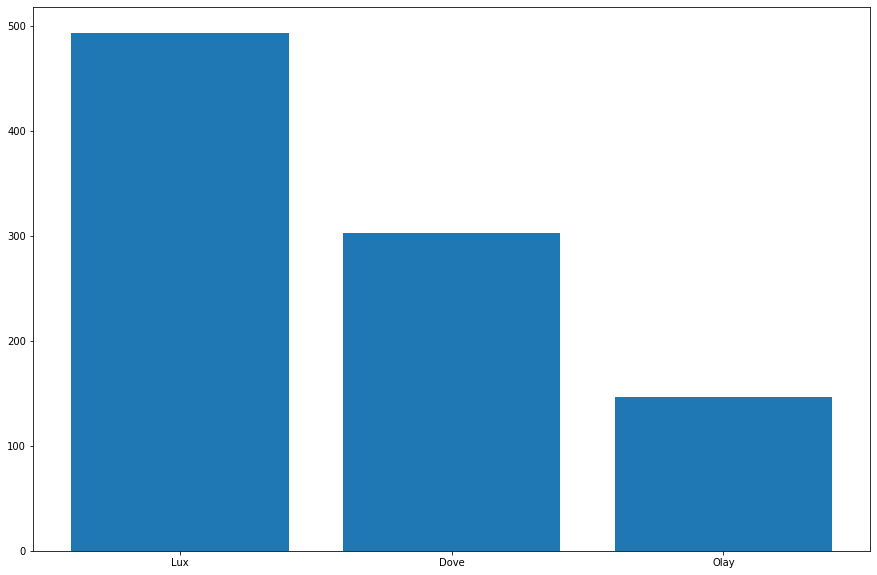

In [307]:
# cat6_brandOfSoaps
counts = Counter(data['cat6_brandOfSoaps'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

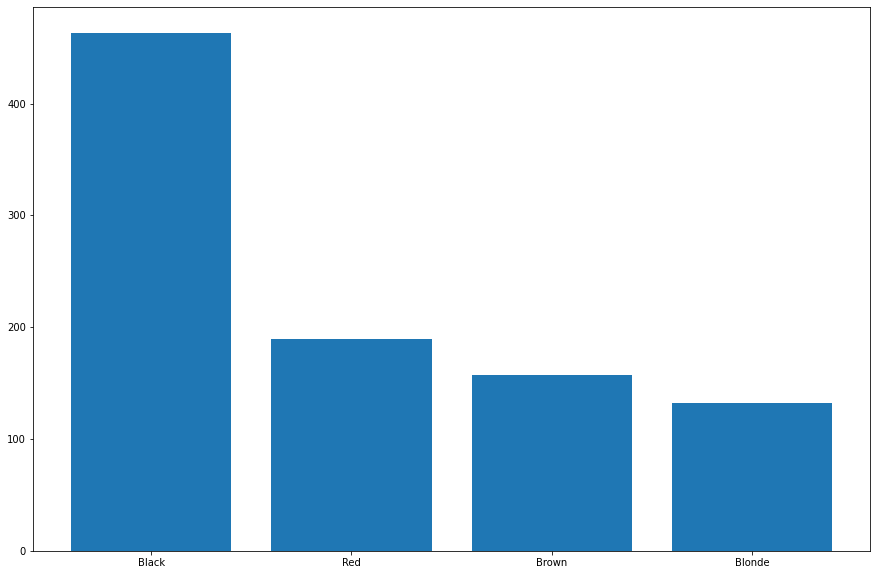

In [308]:
# cat2_hairColor
counts = Counter(data['cat2_hairColor'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

#### 2. Провести проверку правдоподобности исходных данных

In [309]:
data

,cat6_brandOfSoaps,cat2_hairColor,num1_15,num2_15,num3_15
0,Lux,Black,282.228024,NaN,807.976365
1,NaN,Red,1039.089956,268.388947,444.529442
2,Lux,Black,500.696085,174.992127,428.723966
3,Lux,Red,1346.429995,108.647900,520.238037
4,Dove,Black,230.576445,150.113065,896.476167
...,...,...,...,...,...
995,Dove,Red,422.732662,170.810692,586.254084
996,Lux,Brown,783.565442,237.086397,826.693312
997,Dove,Red,410.595523,196.686858,600.377791
998,Lux,Black,-237.136035,179.262913,371.380055


#### 3. Поиск аномальных значений

<AxesSubplot:>

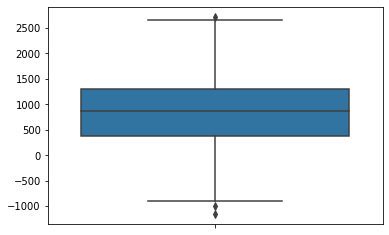

In [310]:
c, low, up = sigmaclip(data['num1_15'].dropna(), 3, 3)
sns.boxplot(y=c)

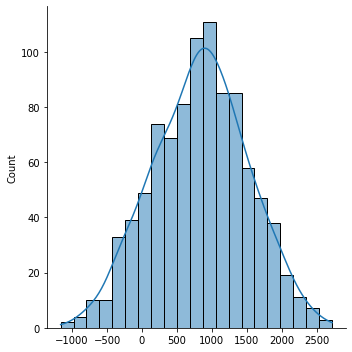

In [311]:
sns.displot(c, kde=True)

<AxesSubplot:>

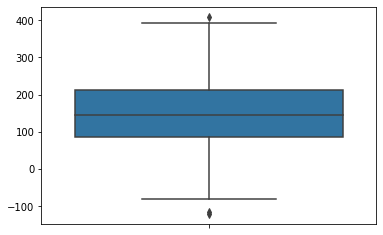

In [312]:
c, low, up = sigmaclip(data['num2_15'].dropna(), 3, 3)
sns.boxplot(y=c)

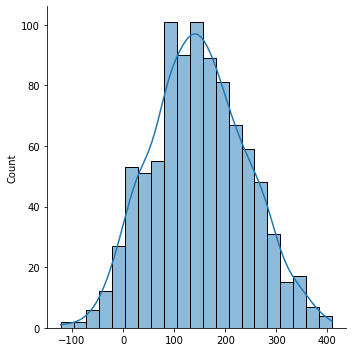

In [313]:
sns.displot(c, kde=True)

<AxesSubplot:>

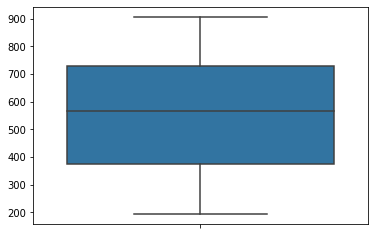

In [314]:
c, low, up = sigmaclip(data['num3_15'].dropna(), 3, 3)
sns.boxplot(y=c)

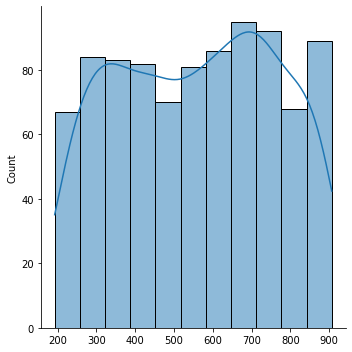

In [315]:
sns.displot(c, kde=True)

<AxesSubplot:>

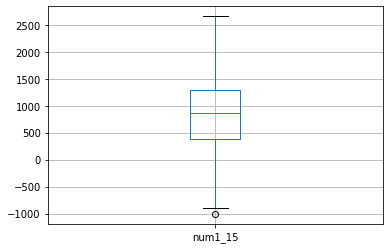

In [316]:
# Метод квантилей

q1 = np.nanquantile(data['num1_15'], 0.25)
q3 = np.nanquantile(data['num1_15'], 0.75)
iqr = q3 - q1
data.query("@q1 - 1.5*@iqr < num1_15 < @q3 + 1.5*@iqr").boxplot(column='num1_15')

#### 4. Поиск и восстановление пропущенных значений

In [317]:
knn_imputer = KNNImputer()
enc = OneHotEncoder()
le = preprocessing.LabelEncoder()

Метод ближайших соседей для `cat6_brandOfSoaps`

In [318]:
def formate_inputed_array(array):
    m = max(array)

    for i in range(len(array)):
        if array[i] == m:
            array[i] = 1
        else:
            array[i] = 0

    array = np.append(array, 0)

    return array

enc_dataset = pd.DataFrame(enc.fit_transform(data[['cat6_brandOfSoaps']]).toarray(), columns=data['cat6_brandOfSoaps'].unique())
idx = enc_dataset.groupby([np.nan]).indices[1]
enc_dataset['Lux'] = pd.DataFrame(np.where(enc_dataset['Lux'].index.isin(idx), np.nan, enc_dataset['Lux']))
enc_dataset['Dove'] = pd.DataFrame(np.where(enc_dataset['Dove'].index.isin(idx), np.nan, enc_dataset['Dove']))
enc_dataset['Olay'] = pd.DataFrame(np.where(enc_dataset['Olay'].index.isin(idx), np.nan, enc_dataset['Olay']))
enc_dataset = enc_dataset.drop(columns=[np.nan])
imputed_dataset = knn_imputer.fit_transform(enc_dataset)

imputed_dataset = np.apply_along_axis(formate_inputed_array, 1, imputed_dataset)

restored_data = enc.inverse_transform(imputed_dataset)
data['cat6_brandOfSoaps'] = restored_data
data['cat6_brandOfSoaps']

0      Dove
1      Olay
2      Dove
3      Dove
4      Dove
       ... 
995    Dove
996    Dove
997    Dove
998    Dove
999    Dove
Name: cat6_brandOfSoaps, Length: 1000, dtype: object

Cамым популярным значением для `cat2_hairColor`

In [319]:
data1 = Counter(data['cat2_hairColor'].dropna())
mode = data1.most_common(1)[0][0]
data['cat2_hairColor'].fillna(mode, inplace=True)
data['cat2_hairColor']

0      Black
1        Red
2      Black
3        Red
4      Black
       ...  
995      Red
996    Brown
997      Red
998    Black
999    Black
Name: cat2_hairColor, Length: 1000, dtype: object

Среднее для `num1_15`

In [320]:
data['num1_15'].fillna(np.mean(data['num1_15'].dropna()), inplace=True)
data['num1_15']

0       282.228024
1      1039.089956
2       500.696085
3      1346.429995
4       230.576445
          ...     
995     422.732662
996     783.565442
997     410.595523
998    -237.136035
999      22.006500
Name: num1_15, Length: 1000, dtype: float64

Медиана для `num2_15`

In [321]:
data['num2_15'].fillna(np.median(data['num2_15'].dropna()), inplace=True)
data['num2_15']

0      145.220453
1      268.388947
2      174.992127
3      108.647900
4      150.113065
          ...    
995    170.810692
996    237.086397
997    196.686858
998    179.262913
999    230.004737
Name: num2_15, Length: 1000, dtype: float64

Метод ближайших соседей для `num3_15`

In [322]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data[['num3_15']])
data[['num3_15']] = scaled_values

dataset_copy = data.copy()
inputed_df = knn_imputer.fit_transform(dataset_copy[['num3_15']])
data['num3_15'] = inputed_df[:, 0]
data['num3_15']

0      0.681191
1      0.427738
2      0.416716
3      0.480534
4      0.742907
         ...   
995    0.526571
996    0.694243
997    0.536420
998    0.376727
999    0.345110
Name: num3_15, Length: 1000, dtype: float64

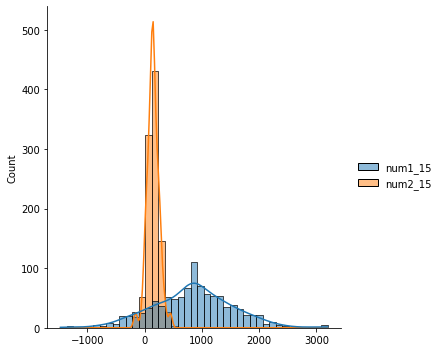

In [323]:
sns.displot(data=[data['num1_15'], data['num2_15']], kde=True)

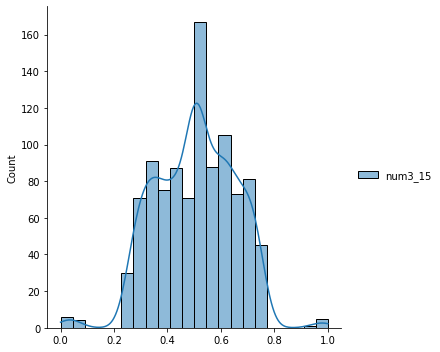

In [324]:
sns.displot(data=[data['num3_15']], kde=True)

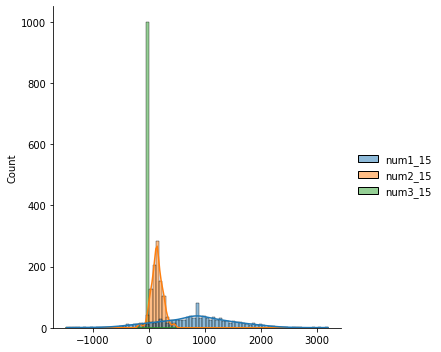

In [325]:
sns.displot(data=data, kde=True)

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat6_brandOfSoaps  1000 non-null   object 
 1   cat2_hairColor     1000 non-null   object 
 2   num1_15            1000 non-null   float64
 3   num2_15            1000 non-null   float64
 4   num3_15            1000 non-null   float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [327]:
data.describe()

,num1_15,num2_15,num3_15
count,1000.000000,1000.000000,1000.000000
mean,843.822989,148.776664,0.505075
std,698.398072,104.142567,0.147492
min,-1467.940219,-184.922189,0.000000
25%,394.078433,86.660775,0.390650
50%,843.822989,145.220453,0.505075
75%,1284.983740,210.869817,0.617954
max,3201.191252,479.162302,1.000000


#### 5. Преобразование данных

In [328]:
# One-hot encoding для cat6_brandOfSoaps
one = enc.fit_transform(data[['cat6_brandOfSoaps']]).toarray()
one

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [329]:
# Label encoding для cat2_hairColor

le.fit_transform(data['cat2_hairColor'])

array([0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 3, 1, 0, 2, 0, 1, 0, 0, 0, 3,
       0, 0, 2, 3, 2, 0, 2, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 2, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 3, 0, 0, 0, 1, 0, 3, 3, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 1,
       0, 0, 1, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 3, 0, 1, 2, 0,
       1, 3, 3, 0, 2, 3, 3, 0, 1, 3, 2, 1, 0, 0, 2, 2, 0, 3, 0, 3, 2, 0,
       3, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 3, 2, 2, 3, 0, 2, 1, 0, 0,
       3, 3, 3, 2, 0, 0, 0, 2, 1, 0, 2, 3, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0,
       3, 0, 0, 2, 2, 0, 3, 3, 0, 2, 0, 3, 3, 0, 0, 0, 1, 2, 0, 1, 3, 1,
       0, 3, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 0, 3, 3, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2,

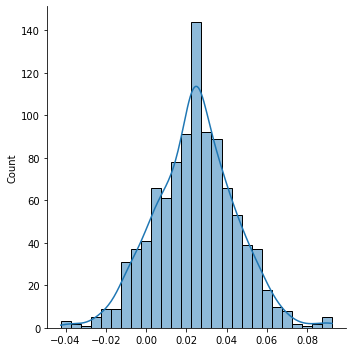

In [330]:
# Нормализация для num1_15

n = preprocessing.normalize([data['num1_15']])
sns.displot(n[0], kde=True)

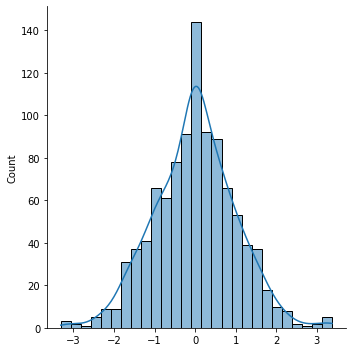

In [331]:
# Стандартизация для num1_15

st = preprocessing.scale(data['num1_15'])
sns.displot(data=st, kde=True)

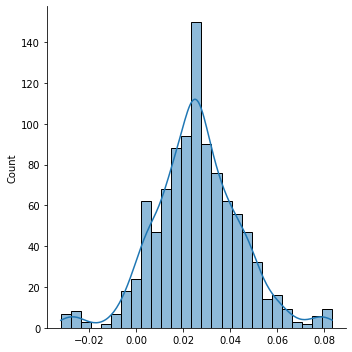

In [332]:
# Нормализация для num2_15

n = preprocessing.normalize([data['num2_15']])
sns.displot(n[0], kde=True)

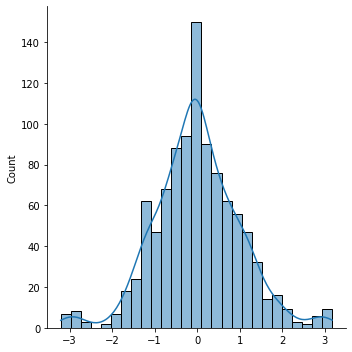

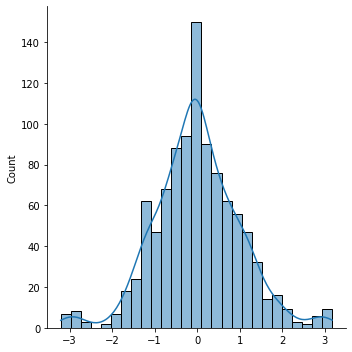

In [333]:
# Стандартизация для num2_15

st = preprocessing.scale(data['num2_15'])
sns.displot(data=st, kde=True)
sns.displot(data=st, kde=True)

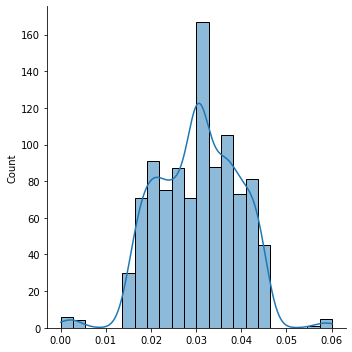

In [334]:
# Нормализация для num3_15

n = preprocessing.normalize([data['num3_15']])
sns.displot(n[0], kde=True)

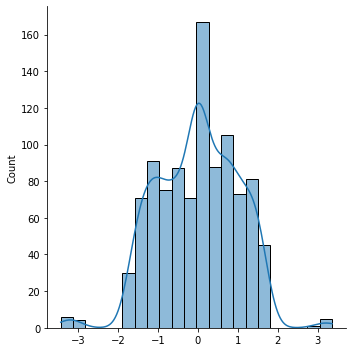

In [335]:
# Стандартизация для num3_15

st = preprocessing.scale(data['num3_15'])
sns.displot(data=st, kde=True)
